In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

r2_train:{0:.3f} 0.7358607476241799
내림차순 정리 RM         3.4
CHAS       1.8
RAD        0.3
ZN         0.1
INDUS      0.0
NOX       -0.0
AGE        0.0
TAX       -0.0
B          0.0
CRIM      -0.1
PTRATIO   -0.6
LSTAT     -0.7
DIS       -1.1
dtype: float64


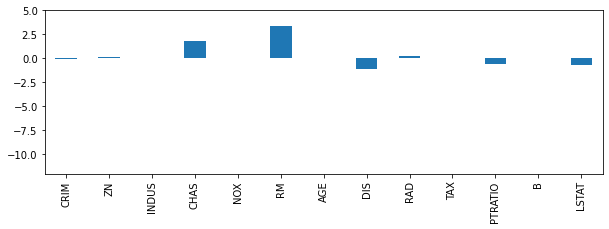

In [3]:
boston = load_boston()

x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.3, random_state=12)

# 규제를 위한 alpha 값 설정
alpha = 0.1

lasso = Lasso(alpha=alpha)

lasso.fit(x_train, y_train)

result = lasso.predict(x_test)

# R^2  값 확인 
r2_train = lasso.score(x_train, y_train)
print("r2_train:{0:.3f}", format(r2_train))

# 컬럼별 회귀계수인 W  값 
coef_table = pd.Series(data=np.round(lasso.coef_,1),index=boston.feature_names)
print("내림차순 정리",coef_table.sort_values(ascending=False))

# 막대그래프 시각화
plt.figure(figsize =(10,3))
coef_table.plot(kind= 'bar')
plt.ylim(-12,5)
plt.show()
